In [4]:
# Mount the google drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# cd only once to the wanted dir at the beginning
%cd /content/drive/MyDrive/HW3

Mounted at /content/drive
[Errno 2] No such file or directory: '/content/drive/MyDrive/HW3'
/content


# Question 1

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

ratings_raw = pd.read_csv("ratings.csv")

movie_map = {x: i for i, x in enumerate(ratings_raw.movieId.unique())}
user_map = {x: i for i, x in enumerate(ratings_raw.userId.unique())}

ratings = np.zeros((len(user_map), len(movie_map)))

for index, row in ratings_raw.iterrows():
  movie_id = movie_map[int(row['movieId'])]
  user_id = user_map[int(row['userId'])]

  ratings[user_id,movie_id] = row['rating']

## 1.1

In [9]:
num_ratings = ratings_raw.movieId.shape[0]
total_ratings = ratings_raw.movieId.unique().shape[0] * ratings_raw.userId.unique().shape[0]

print(f"Sparsity: {num_ratings / total_ratings}")

Sparsity: 0.016999683055613623


## 1.2

<AxesSubplot:>

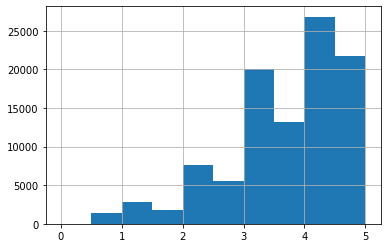

In [10]:
bins = np.arange(0.0, 5.5, 0.5)
ratings_raw.rating.hist(bins=bins)

People who rate movies are more likely to rate them higher than lower. People are also more likely to rate movies using whole numbers rather than halves.

## 1.3

<BarContainer object of 9724 artists>

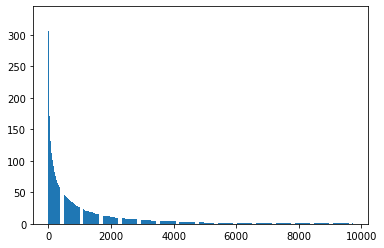

In [ ]:
counts = ratings_raw.movieId.value_counts()
counts = sorted(counts, reverse=True)
plt.bar(np.arange(len(counts)), counts)

## 1.4

<BarContainer object of 610 artists>

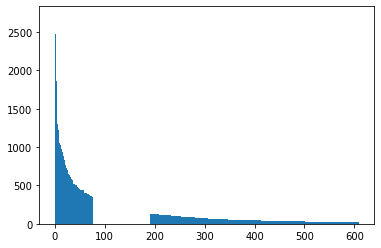

In [ ]:
counts = ratings_raw.userId.value_counts()
counts = sorted(counts, reverse=True)
plt.bar(np.arange(len(counts)), counts)

# Question 2

A. $ 
\frac{1}{|I_{u}|}  \sum_{k \in I_{u}} r_{uk}
$

B. $I_u \cap I_v$ is the set of movie indices that both user $u$ and user $v$ rated. It very well could be empty since the ratings matrix is sparse. It is possible two users have not seen any of the same movies and thus have not rated any of the same movies.

# Question 3

Mean centering is done so as to not skew the predicted rating more towards another user's rating solely because they rate movies higher on average. Similarly, the function should not weight users' ratings lower just because they give harsher ratings on average.

# Question 4

In [11]:
!pip install scikit-surprise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 KB 13.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp38-cp38-linux_x86_64.whl size=3366531 sha256=0daa10908523c14dd59559dad41b954a48e76c5ea250623c4f6756af2422f428
  Stored in directory: /root/.cache/pip/wheels/af/db/86/2c18183a80ba05da35bf0fb7417aac5cddbd93bcb1b92fd3ea
Successfully built scikit-surprise


In [ ]:
from surprise import KNNBasic, Dataset, Reader
from surprise.model_selection import cross_validate
from tqdm import tqdm

sim_options = {
    'name': 'pearson'
}
reader = Reader(rating_scale=(0,5))
data = Dataset.load_from_df(ratings_raw[["userId", "movieId", "rating"]], reader)
maes = []
rmses = []
for k in tqdm(range(2, 102, 2)):
  algo = KNNBasic(sim_options=sim_options, k=k)
  results = cross_validate(algo, data, cv=10, measures=["RMSE", "MAE"], verbose=False)

  maes.append(np.mean(results['test_mae']))
  rmses.append(np.mean(results['test_rmse']))

  0%|          | 0/50 [00:00<?, ?it/s]

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.


  2%|▏         | 1/50 [00:12<10:33, 12.93s/it]

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.


  4%|▍         | 2/50 [00:25<10:11, 12.74s/it]

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.


  6%|▌         | 3/50 [00:38<10:06, 12.90s/it]

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.


  8%|▊         | 4/50 [00:51<10:01, 13.07s/it]

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.


 10%|█         | 5/50 [01:15<12:34, 16.76s/it]

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...


 12%|█▏        | 6/50 [01:33<12:33, 17.12s/it]

Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.


 14%|█▍        | 7/50 [01:56<13:44, 19.18s/it]

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.


 16%|█▌        | 8/50 [02:19<14:13, 20.32s/it]

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.


 18%|█▊        | 9/50 [02:33<12:40, 18.56s/it]

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.


 20%|██        | 10/50 [02:49<11:42, 17.56s/it]

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.


 22%|██▏       | 11/50 [03:03<10:46, 16.56s/it]

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.


 24%|██▍       | 12/50 [03:18<10:06, 15.97s/it]

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.


 26%|██▌       | 13/50 [03:32<09:34, 15.54s/it]

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.


 28%|██▊       | 14/50 [03:51<09:54, 16.52s/it]

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...


 30%|███       | 15/50 [04:06<09:23, 16.10s/it]

Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.


 32%|███▏      | 16/50 [04:21<08:54, 15.73s/it]

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.


 34%|███▍      | 17/50 [04:37<08:45, 15.92s/it]

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.


 36%|███▌      | 18/50 [04:53<08:22, 15.70s/it]

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.


 38%|███▊      | 19/50 [05:08<08:04, 15.63s/it]

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.


 40%|████      | 20/50 [05:24<07:55, 15.84s/it]

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.


 42%|████▏     | 21/50 [05:41<07:45, 16.03s/it]

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.


 44%|████▍     | 22/50 [05:57<07:27, 15.98s/it]

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.


 46%|████▌     | 23/50 [06:12<07:06, 15.78s/it]

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.


 48%|████▊     | 24/50 [06:27<06:46, 15.64s/it]

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.


 50%|█████     | 25/50 [06:43<06:29, 15.57s/it]

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.


 52%|█████▏    | 26/50 [06:59<06:14, 15.62s/it]

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.


 54%|█████▍    | 27/50 [07:14<06:01, 15.74s/it]

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.


 56%|█████▌    | 28/50 [07:30<05:47, 15.77s/it]

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.


 58%|█████▊    | 29/50 [07:47<05:38, 16.14s/it]

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.


 60%|██████    | 30/50 [08:05<05:29, 16.46s/it]

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.


 62%|██████▏   | 31/50 [08:20<05:08, 16.25s/it]

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.


 64%|██████▍   | 32/50 [08:36<04:49, 16.10s/it]

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.


 66%|██████▌   | 33/50 [08:52<04:31, 15.95s/it]

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.


 68%|██████▊   | 34/50 [09:08<04:15, 15.96s/it]

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...


 70%|███████   | 35/50 [09:25<04:03, 16.23s/it]

Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.


 72%|███████▏  | 36/50 [09:40<03:45, 16.14s/it]

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.


 74%|███████▍  | 37/50 [09:56<03:28, 16.07s/it]

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...


 76%|███████▌  | 38/50 [10:12<03:12, 16.05s/it]

Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.


 78%|███████▊  | 39/50 [10:28<02:55, 15.97s/it]

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.


 80%|████████  | 40/50 [10:44<02:39, 16.00s/it]

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.


 82%|████████▏ | 41/50 [11:01<02:26, 16.24s/it]

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.


 84%|████████▍ | 42/50 [11:17<02:09, 16.22s/it]

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.


 86%|████████▌ | 43/50 [11:33<01:53, 16.18s/it]

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.


 88%|████████▊ | 44/50 [11:49<01:36, 16.13s/it]

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.


 90%|█████████ | 45/50 [12:07<01:23, 16.60s/it]

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.


 92%|█████████▏| 46/50 [12:24<01:06, 16.60s/it]

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.


 94%|█████████▍| 47/50 [12:41<00:50, 16.89s/it]

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...


 96%|█████████▌| 48/50 [12:57<00:33, 16.62s/it]

Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.


 98%|█████████▊| 49/50 [13:13<00:16, 16.49s/it]

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.


100%|██████████| 50/50 [13:30<00:00, 16.21s/it]


Text(0.5, 1.0, 'K vs. Average MAE')

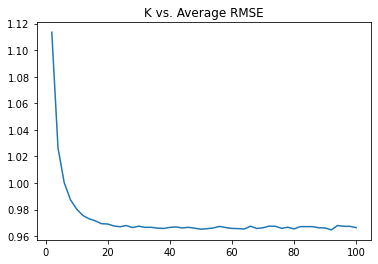

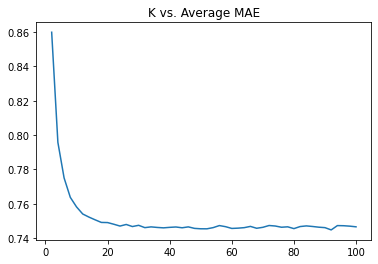

In [ ]:
import matplotlib.pyplot as plt

# This is just because my code was buggy, do not need it included
# rmses = maes[1::2]
# maes_final = maes[::2]

k = np.arange(2, 102, 2)
plt.plot(k, rmses)
plt.title("K vs. Average RMSE")
plt.figure()
plt.plot(k, maes_final)
plt.title("K vs. Average MAE")

# Question 5

The minimum k is 20 for both RMSE and MAE

# Question 6

In [ ]:
import collections

def trim_pop(testset):
  counts = collections.Counter([x[1] for x in testset])
  return [x for x in testset if counts[x[1]] > 2]

def trim_unpop(testset):
  counts = collections.Counter([x[1] for x in testset])
  return [x for x in testset if counts[x[1]] <= 2]

def trim_var(testset):
  reviews = collections.defaultdict(list)
  for tup in testset:
    reviews[tup[1]].append(tup[2])
  return [x for x in testset if len(reviews[x[1]]) >= 5 and np.var(reviews[x[1]]) >= 2.0]

In [ ]:
from surprise import KNNBasic, Dataset, Reader, accuracy
from surprise.model_selection import cross_validate, KFold
from tqdm import tqdm

trimming_fns = [trim_pop, trim_unpop, trim_var]
sim_options = {
    'name': 'pearson'
}
reader = Reader(rating_scale=(0,5))
data = Dataset.load_from_df(ratings_raw[["userId", "movieId", "rating"]], reader)
kf = KFold(n_splits=10)

rmses_ks_pop = []
rmses_ks_unpop = []
rmses_ks_var = []

for k in tqdm(range(2, 102, 2)):
  rmses_folds = [[], [], []]
  for trainset, testset in kf.split(data):
    algo = KNNBasic(sim_options=sim_options, k=k)
    algo.fit(trainset)

    for i, trim_fn in enumerate(trimming_fns):
      trimmed = trim_fn(testset)
      preds = algo.test(trimmed)
      rmses_folds[i].append(accuracy.rmse(preds, verbose=False))

  rmses_ks_pop.append(np.mean(rmses_folds[0]))
  rmses_ks_unpop.append(np.mean(rmses_folds[1]))
  rmses_ks_var.append(np.mean(rmses_folds[2]))

  0%|          | 0/50 [00:00<?, ?it/s]

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.


  2%|▏         | 1/50 [00:17<14:04, 17.23s/it]

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.


  4%|▍         | 2/50 [00:31<12:32, 15.67s/it]

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.


  6%|▌         | 3/50 [00:46<11:53, 15.18s/it]

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.


  8%|▊         | 4/50 [01:01<11:33, 15.07s/it]

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.


 10%|█         | 5/50 [01:16<11:27, 15.27s/it]

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...


 12%|█▏        | 6/50 [01:32<11:16, 15.38s/it]

Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.


 14%|█▍        | 7/50 [01:48<11:03, 15.43s/it]

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.


 16%|█▌        | 8/50 [02:05<11:15, 16.09s/it]

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.


 18%|█▊        | 9/50 [02:21<11:01, 16.13s/it]

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...


 20%|██        | 10/50 [02:38<10:48, 16.21s/it]

Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.


 22%|██▏       | 11/50 [02:54<10:31, 16.19s/it]

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.


 24%|██▍       | 12/50 [03:10<10:19, 16.31s/it]

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.


 26%|██▌       | 13/50 [03:29<10:27, 16.95s/it]

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.


 28%|██▊       | 14/50 [03:45<10:04, 16.80s/it]

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.


 30%|███       | 15/50 [04:02<09:48, 16.82s/it]

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.


 32%|███▏      | 16/50 [04:19<09:27, 16.68s/it]

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...


 34%|███▍      | 17/50 [04:37<09:26, 17.17s/it]

Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.


 36%|███▌      | 18/50 [04:54<09:14, 17.31s/it]

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.


 38%|███▊      | 19/50 [05:12<08:55, 17.28s/it]

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.


 40%|████      | 20/50 [05:29<08:38, 17.29s/it]

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.


 42%|████▏     | 21/50 [05:48<08:35, 17.79s/it]

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.


 44%|████▍     | 22/50 [06:05<08:12, 17.60s/it]

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.


 46%|████▌     | 23/50 [06:22<07:51, 17.45s/it]

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.


 48%|████▊     | 24/50 [06:40<07:36, 17.55s/it]

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.


 50%|█████     | 25/50 [06:58<07:26, 17.85s/it]

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.


 52%|█████▏    | 26/50 [07:16<07:06, 17.78s/it]

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.


 54%|█████▍    | 27/50 [07:34<06:49, 17.79s/it]

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.


 56%|█████▌    | 28/50 [07:53<06:40, 18.22s/it]

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...


 58%|█████▊    | 29/50 [08:11<06:20, 18.10s/it]

Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.


 60%|██████    | 30/50 [08:28<05:58, 17.90s/it]

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.


 62%|██████▏   | 31/50 [08:48<05:49, 18.41s/it]

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.


 64%|██████▍   | 32/50 [09:06<05:30, 18.34s/it]

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.


 66%|██████▌   | 33/50 [09:24<05:11, 18.31s/it]

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.


 68%|██████▊   | 34/50 [09:44<04:58, 18.66s/it]

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...


 70%|███████   | 35/50 [10:02<04:36, 18.41s/it]

Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.


 72%|███████▏  | 36/50 [10:20<04:15, 18.24s/it]

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.


 74%|███████▍  | 37/50 [10:39<04:01, 18.58s/it]

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.


 76%|███████▌  | 38/50 [10:57<03:39, 18.28s/it]

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.


 78%|███████▊  | 39/50 [11:14<03:19, 18.10s/it]

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.


 80%|████████  | 40/50 [11:33<03:04, 18.41s/it]

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...


 82%|████████▏ | 41/50 [11:51<02:44, 18.30s/it]

Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.


 84%|████████▍ | 42/50 [12:09<02:25, 18.13s/it]

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.


 86%|████████▌ | 43/50 [12:26<02:04, 17.83s/it]

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...


 88%|████████▊ | 44/50 [12:45<01:49, 18.22s/it]

Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.


 90%|█████████ | 45/50 [13:03<01:30, 18.13s/it]

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...


 92%|█████████▏| 46/50 [13:21<01:12, 18.05s/it]

Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...


 94%|█████████▍| 47/50 [13:41<00:55, 18.46s/it]

Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.


 96%|█████████▌| 48/50 [13:58<00:36, 18.27s/it]

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...


 98%|█████████▊| 49/50 [14:16<00:18, 18.04s/it]

Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...


100%|██████████| 50/50 [14:35<00:00, 17.52s/it]

Done computing similarity matrix.


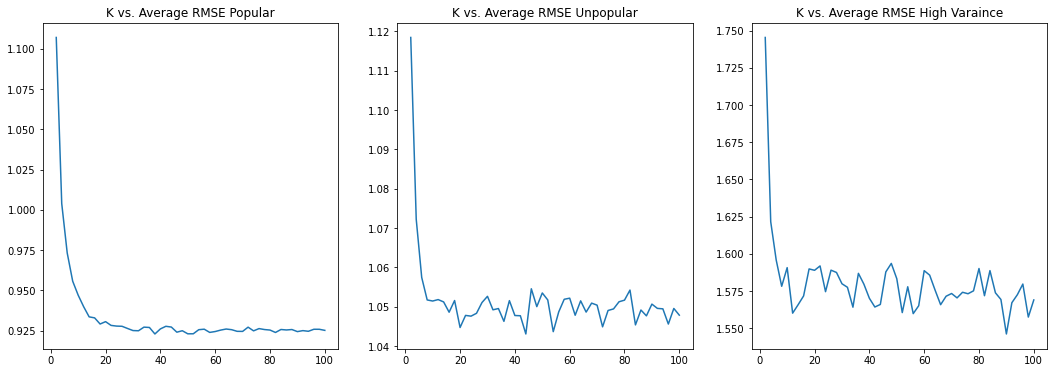

In [ ]:
import matplotlib.pyplot as plt

k = np.arange(2, 102, 2)

fig, axes = plt.subplots(1, 3, figsize = (18, 6))
axes[0].plot(k, rmses_ks_pop)
axes[0].title.set_text("K vs. Average RMSE Popular")
axes[1].plot(k, rmses_ks_unpop)
axes[1].title.set_text("K vs. Average RMSE Unpopular")
axes[2].plot(k, rmses_ks_var)
axes[2].title.set_text("K vs. Average RMSE High Varaince")

## ROC Plotting

In [ ]:
from surprise.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score

### No Trimming

Computing the pearson similarity matrix...
Done computing similarity matrix.


Text(0.5, 1.0, 'ROC Curves for the Whole Dataset')

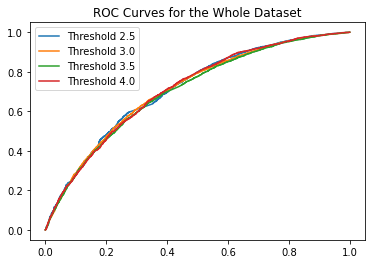

In [ ]:
sim_options = {
    'name': 'pearson'
}
reader = Reader(rating_scale=(0,5))
data = Dataset.load_from_df(ratings_raw[["userId", "movieId", "rating"]], reader)
trainset, testset = train_test_split(data, test_size=0.1)
algo = KNNBasic(sim_options=sim_options, k=20)

algo.fit(trainset)

trimmed = testset
preds = algo.test(trimmed)
preds = [x.est for x in preds]

thresholded_gt = {}
for threshold in [2.5, 3.0, 3.5, 4.0]:
  thresholded_gt[threshold] = [1 if x[2] > threshold else 0 for x in trimmed]

for i, threshold in enumerate([2.5, 3.0, 3.5, 4.0]):
  fpr, tpr, _ = roc_curve(thresholded_gt[threshold], preds)
  plt.plot(fpr, tpr, label=f"Threshold {threshold}")

plt.legend()
plt.title("ROC Curves for the Whole Dataset")

### Popular

Computing the pearson similarity matrix...
Done computing similarity matrix.


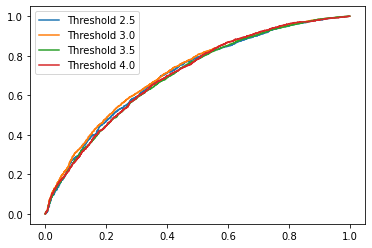

In [ ]:
sim_options = {
    'name': 'pearson'
}
reader = Reader(rating_scale=(0,5))
data = Dataset.load_from_df(ratings_raw[["userId", "movieId", "rating"]], reader)
trainset, testset = train_test_split(data, test_size=0.1)
algo = KNNBasic(sim_options=sim_options, k=20)

algo.fit(trainset)

trimmed = trim_pop(testset)
preds = algo.test(trimmed)
preds = [x.est for x in preds]

thresholded_gt = {}
for threshold in [2.5, 3.0, 3.5, 4.0]:
  thresholded_gt[threshold] = [1 if x[2] > threshold else 0 for x in trimmed]

for i, threshold in enumerate([2.5, 3.0, 3.5, 4.0]):
  fpr, tpr, _ = roc_curve(thresholded_gt[threshold], preds)
  plt.plot(fpr, tpr, label=f"Threshold {threshold}")

plt.legend()
plt.title("ROC Curves for Popular Subset")

### Unpopular

Computing the pearson similarity matrix...
Done computing similarity matrix.


Text(0.5, 1.0, 'ROC Curves for Unpopular Subset')

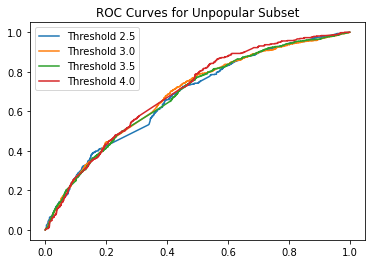

In [ ]:
sim_options = {
    'name': 'pearson'
}
reader = Reader(rating_scale=(0,5))
data = Dataset.load_from_df(ratings_raw[["userId", "movieId", "rating"]], reader)
trainset, testset = train_test_split(data, test_size=0.1)
algo = KNNBasic(sim_options=sim_options, k=20)

algo.fit(trainset)

trimmed = trim_unpop(testset)
preds = algo.test(trimmed)
preds = [x.est for x in preds]

thresholded_gt = {}
for threshold in [2.5, 3.0, 3.5, 4.0]:
  thresholded_gt[threshold] = [1 if x[2] > threshold else 0 for x in trimmed]

for i, threshold in enumerate([2.5, 3.0, 3.5, 4.0]):
  fpr, tpr, _ = roc_curve(thresholded_gt[threshold], preds)
  plt.plot(fpr, tpr, label=f"Threshold {threshold}")

plt.legend()
plt.title("ROC Curves for Unpopular Subset")

### High Variance

Computing the pearson similarity matrix...
Done computing similarity matrix.
112


Text(0.5, 1.0, 'ROC Curves for High Variance Subset')

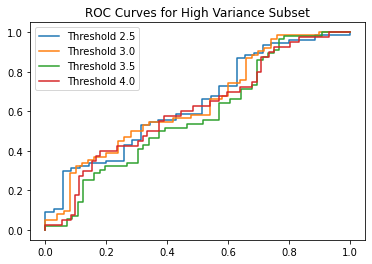

In [ ]:
from surprise import KNNBasic, Dataset, Reader, accuracy
from surprise.model_selection import cross_validate, KFold
from tqdm import tqdm
sim_options = {
    'name': 'pearson'
}
reader = Reader(rating_scale=(0,5))
data = Dataset.load_from_df(ratings_raw[["userId", "movieId", "rating"]], reader)
trainset, testset = train_test_split(data, test_size=0.1)
algo = KNNBasic(sim_options=sim_options, k=20)

algo.fit(trainset)

trimmed = trim_var(testset)
print(len(trimmed))
preds = algo.test(trimmed)
preds = [x.est for x in preds]

thresholded_gt = {}
for threshold in [2.5, 3.0, 3.5, 4.0]:
  thresholded_gt[threshold] = [1 if x[2] > threshold else 0 for x in trimmed]

for i, threshold in enumerate([2.5, 3.0, 3.5, 4.0]):
  fpr, tpr, _ = roc_curve(thresholded_gt[threshold], preds)
  plt.plot(fpr, tpr, label=f"Threshold {threshold}")

plt.legend()
plt.title("ROC Curves for High Variance Subset")

# Question 7

# Question 8

## Part A/B

In [12]:
from surprise.prediction_algorithms.matrix_factorization import NMF
from surprise import KNNBasic, Dataset, Reader
from surprise.model_selection import cross_validate, train_test_split
from tqdm import tqdm

reader = Reader(rating_scale=(0,5))
data = Dataset.load_from_df(ratings_raw[["userId", "movieId", "rating"]], reader)
trainset, testset = train_test_split(data, test_size=0.1)

maes = []
rmses = []
for k in tqdm(range(2, 52, 2)):
  algo = NMF(n_factors=k, biased=False)
  results = cross_validate(algo, data, cv=10, measures=["RMSE", "MAE"], verbose=False)

  maes.append(np.mean(results['test_mae']))
  rmses.append(np.mean(results['test_rmse']))

100%|██████████| 25/25 [25:52<00:00, 62.10s/it]


Text(0.5, 1.0, 'K vs. Average MAE')

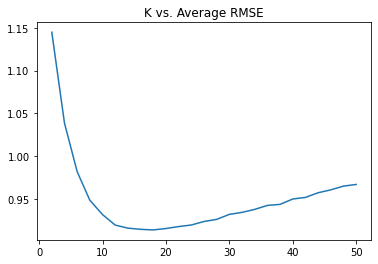

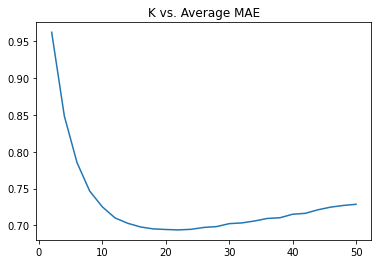

In [13]:
k = np.arange(2, 52, 2)
plt.plot(k, rmses)
plt.title("K vs. Average RMSE")
plt.figure()
plt.plot(k, maes)
plt.title("K vs. Average MAE")

In [15]:
print(k[np.argmin(rmses)], k[np.argmin(maes)])

18 22


## Part C

In [ ]:
from surprise import KNNBasic, Dataset, Reader, accuracy
from surprise.model_selection import cross_validate, KFold
from tqdm import tqdm
from surprise.prediction_algorithms.matrix_factorization import NMF

trimming_fns = [trim_pop, trim_unpop, trim_var]
reader = Reader(rating_scale=(0,5))
data = Dataset.load_from_df(ratings_raw[["userId", "movieId", "rating"]], reader)
kf = KFold(n_splits=10)

rmses_ks_pop = []
rmses_ks_unpop = []
rmses_ks_var = []

for k in tqdm(range(2, 52, 2)):
  rmses_folds = [[], [], []]
  for trainset, testset in kf.split(data):
    algo = NMF(n_factors=k, biased=False)
    algo.fit(trainset)

    for i, trim_fn in enumerate(trimming_fns):
      trimmed = trim_fn(testset)
      preds = algo.test(trimmed)
      rmses_folds[i].append(accuracy.rmse(preds, verbose=False))

  rmses_ks_pop.append(np.mean(rmses_folds[0]))
  rmses_ks_unpop.append(np.mean(rmses_folds[1]))
  rmses_ks_var.append(np.mean(rmses_folds[2]))

100%|██████████| 25/25 [22:28<00:00, 53.93s/it]


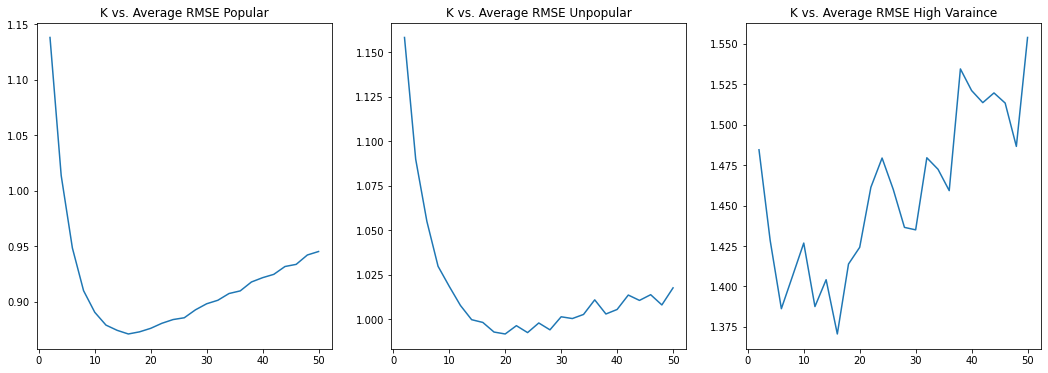

In [ ]:
import matplotlib.pyplot as plt

k = np.arange(2, 52, 2)

fig, axes = plt.subplots(1, 3, figsize = (18, 6))
axes[0].plot(k, rmses_ks_pop)
axes[0].title.set_text("K vs. Average RMSE Popular")
axes[1].plot(k, rmses_ks_unpop)
axes[1].title.set_text("K vs. Average RMSE Unpopular")
axes[2].plot(k, rmses_ks_var)
axes[2].title.set_text("K vs. Average RMSE High Varaince")

## Part D

In [ ]:
from surprise.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score

### No Trimming

Text(0.5, 1.0, 'ROC Curves for the Whole Dataset')

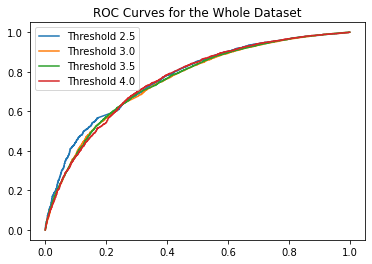

In [ ]:
sim_options = {
    'name': 'pearson'
}
reader = Reader(rating_scale=(0,5))
data = Dataset.load_from_df(ratings_raw[["userId", "movieId", "rating"]], reader)
trainset, testset = train_test_split(data, test_size=0.1)
algo = NMF(n_factors=15, biased=False)

algo.fit(trainset)

trimmed = testset
preds = algo.test(trimmed)
preds = [x.est for x in preds]

thresholded_gt = {}
for threshold in [2.5, 3.0, 3.5, 4.0]:
  thresholded_gt[threshold] = [1 if x[2] > threshold else 0 for x in trimmed]

for i, threshold in enumerate([2.5, 3.0, 3.5, 4.0]):
  fpr, tpr, _ = roc_curve(thresholded_gt[threshold], preds)
  plt.plot(fpr, tpr, label=f"Threshold {threshold}")

plt.legend()
plt.title("ROC Curves for the Whole Dataset")

### Popular

Text(0.5, 1.0, 'ROC Curves for Popular Subset')

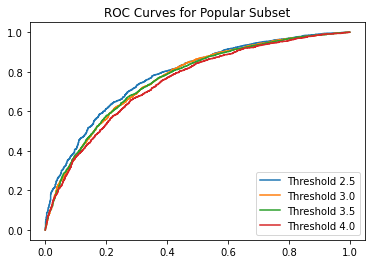

In [ ]:
reader = Reader(rating_scale=(0,5))
data = Dataset.load_from_df(ratings_raw[["userId", "movieId", "rating"]], reader)
trainset, testset = train_test_split(data, test_size=0.1)
algo = NMF(n_factors=15, biased=False)

algo.fit(trainset)

trimmed = trim_pop(testset)
preds = algo.test(trimmed)
preds = [x.est for x in preds]

thresholded_gt = {}
for threshold in [2.5, 3.0, 3.5, 4.0]:
  thresholded_gt[threshold] = [1 if x[2] > threshold else 0 for x in trimmed]

for i, threshold in enumerate([2.5, 3.0, 3.5, 4.0]):
  fpr, tpr, _ = roc_curve(thresholded_gt[threshold], preds)
  plt.plot(fpr, tpr, label=f"Threshold {threshold}")

plt.legend()
plt.title("ROC Curves for Popular Subset")

### Unpopular

Text(0.5, 1.0, 'ROC Curves for Unpopular Subset')

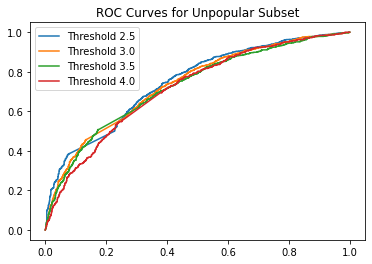

In [ ]:
reader = Reader(rating_scale=(0,5))
data = Dataset.load_from_df(ratings_raw[["userId", "movieId", "rating"]], reader)
trainset, testset = train_test_split(data, test_size=0.1)
algo = NMF(n_factors=15, biased=False)

algo.fit(trainset)

trimmed = trim_unpop(testset)
preds = algo.test(trimmed)
preds = [x.est for x in preds]

thresholded_gt = {}
for threshold in [2.5, 3.0, 3.5, 4.0]:
  thresholded_gt[threshold] = [1 if x[2] > threshold else 0 for x in trimmed]

for i, threshold in enumerate([2.5, 3.0, 3.5, 4.0]):
  fpr, tpr, _ = roc_curve(thresholded_gt[threshold], preds)
  plt.plot(fpr, tpr, label=f"Threshold {threshold}")

plt.legend()
plt.title("ROC Curves for Unpopular Subset")

### High Variance

Text(0.5, 1.0, 'ROC Curves for High Variance Subset')

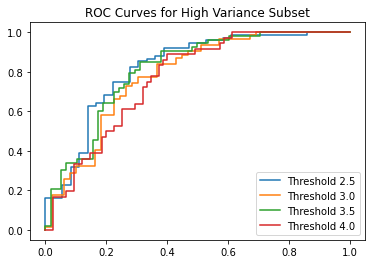

In [ ]:
reader = Reader(rating_scale=(0,5))
data = Dataset.load_from_df(ratings_raw[["userId", "movieId", "rating"]], reader)
trainset, testset = train_test_split(data, test_size=0.1)
algo = NMF(n_factors=15, biased=False)

algo.fit(trainset)

trimmed = trim_var(testset)
preds = algo.test(trimmed)
preds = [x.est for x in preds]

thresholded_gt = {}
for threshold in [2.5, 3.0, 3.5, 4.0]:
  thresholded_gt[threshold] = [1 if x[2] > threshold else 0 for x in trimmed]

for i, threshold in enumerate([2.5, 3.0, 3.5, 4.0]):
  fpr, tpr, _ = roc_curve(thresholded_gt[threshold], preds)
  plt.plot(fpr, tpr, label=f"Threshold {threshold}")

plt.legend()
plt.title("ROC Curves for High Variance Subset")

# Question 10

In [ ]:
from surprise.prediction_algorithms.matrix_factorization import NMF
from surprise import KNNBasic, Dataset, Reader
from surprise.model_selection import cross_validate, train_test_split
from tqdm import tqdm

reader = Reader(rating_scale=(0,5))
data = Dataset.load_from_df(ratings_raw[["userId", "movieId", "rating"]], reader)
trainset, testset = train_test_split(data, test_size=0.1)

maes = []
rmses = []
for k in tqdm(range(2, 52, 2)):
  algo = NMF(n_factors=k, biased=True)
  results = cross_validate(algo, data, cv=10, measures=["RMSE", "MAE"], verbose=False)

  maes.append(np.mean(results['test_mae']))
  rmses.append(np.mean(results['test_rmse']))

100%|██████████| 25/25 [22:10<00:00, 53.22s/it]


Text(0.5, 1.0, 'K vs. Average MAE')

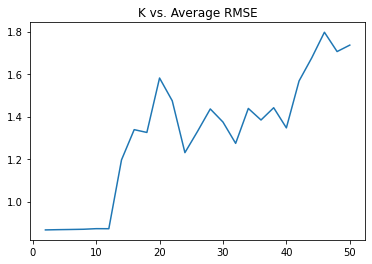

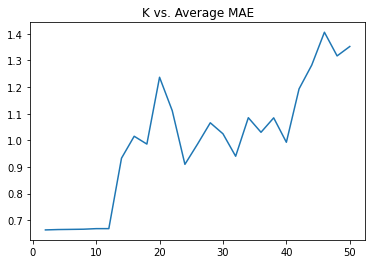

In [ ]:
k = np.arange(2, 52, 2)
plt.plot(k, rmses)
plt.title("K vs. Average RMSE")
plt.figure()
plt.plot(k, maes)
plt.title("K vs. Average MAE")

## Part C

In [ ]:
from surprise import KNNBasic, Dataset, Reader, accuracy
from surprise.model_selection import cross_validate, KFold
from tqdm import tqdm
from surprise.prediction_algorithms.matrix_factorization import NMF

trimming_fns = [trim_pop, trim_unpop, trim_var]
reader = Reader(rating_scale=(0,5))
data = Dataset.load_from_df(ratings_raw[["userId", "movieId", "rating"]], reader)
kf = KFold(n_splits=10)

rmses_ks_pop = []
rmses_ks_unpop = []
rmses_ks_var = []

for k in tqdm(range(2, 52, 2)):
  rmses_folds = [[], [], []]
  for trainset, testset in kf.split(data):
    algo = NMF(n_factors=k, biased=True)
    algo.fit(trainset)

    for i, trim_fn in enumerate(trimming_fns):
      trimmed = trim_fn(testset)
      preds = algo.test(trimmed)
      rmses_folds[i].append(accuracy.rmse(preds, verbose=False))

  rmses_ks_pop.append(np.mean(rmses_folds[0]))
  rmses_ks_unpop.append(np.mean(rmses_folds[1]))
  rmses_ks_var.append(np.mean(rmses_folds[2]))

100%|██████████| 25/25 [22:51<00:00, 54.86s/it]


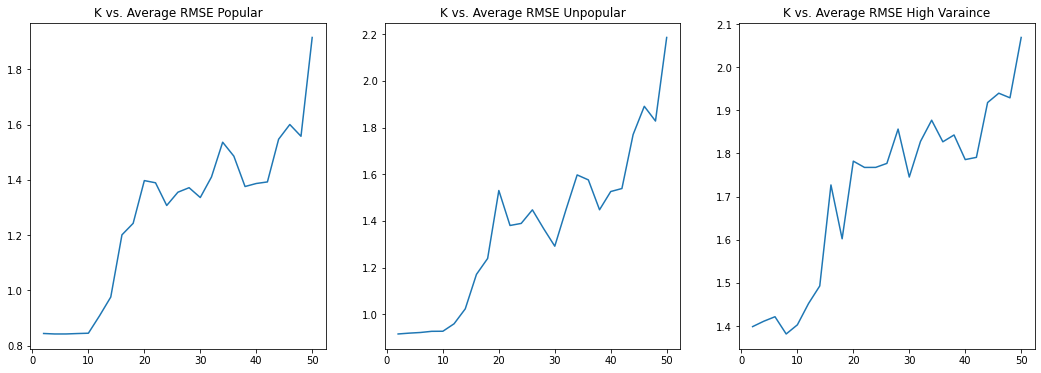

In [ ]:
import matplotlib.pyplot as plt

k = np.arange(2, 52, 2)

fig, axes = plt.subplots(1, 3, figsize = (18, 6))
axes[0].plot(k, rmses_ks_pop)
axes[0].title.set_text("K vs. Average RMSE Popular")
axes[1].plot(k, rmses_ks_unpop)
axes[1].title.set_text("K vs. Average RMSE Unpopular")
axes[2].plot(k, rmses_ks_var)
axes[2].title.set_text("K vs. Average RMSE High Varaince")

## Part D

In [ ]:
from surprise.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score

### No Trimming

Text(0.5, 1.0, 'ROC Curves for Full Testset')

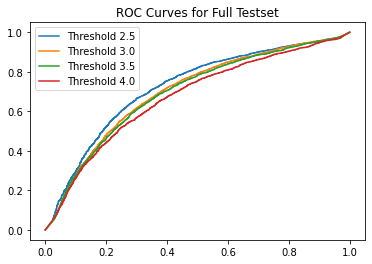

In [ ]:
reader = Reader(rating_scale=(0,5))
data = Dataset.load_from_df(ratings_raw[["userId", "movieId", "rating"]], reader)
trainset, testset = train_test_split(data, test_size=0.1)
algo = NMF(n_factors=15, biased=True)

algo.fit(trainset)

trimmed = testset
preds = algo.test(trimmed)
preds = [x.est for x in preds]

thresholded_gt = {}
for threshold in [2.5, 3.0, 3.5, 4.0]:
  thresholded_gt[threshold] = [1 if x[2] > threshold else 0 for x in trimmed]

for i, threshold in enumerate([2.5, 3.0, 3.5, 4.0]):
  fpr, tpr, _ = roc_curve(thresholded_gt[threshold], preds)
  plt.plot(fpr, tpr, label=f"Threshold {threshold}")

plt.legend()
plt.title("ROC Curves for Full Testset")

### Popular Subset

Text(0.5, 1.0, 'ROC Curves for Popular Subset')

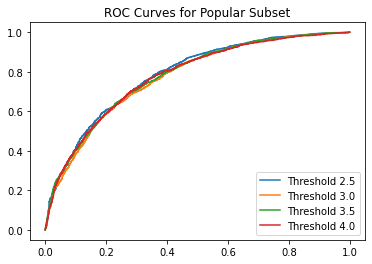

In [ ]:
reader = Reader(rating_scale=(0,5))
data = Dataset.load_from_df(ratings_raw[["userId", "movieId", "rating"]], reader)
trainset, testset = train_test_split(data, test_size=0.1)
algo = NMF(n_factors=15, biased=True)

algo.fit(trainset)

trimmed = trim_pop(testset)
preds = algo.test(trimmed)
preds = [x.est for x in preds]

thresholded_gt = {}
for threshold in [2.5, 3.0, 3.5, 4.0]:
  thresholded_gt[threshold] = [1 if x[2] > threshold else 0 for x in trimmed]

for i, threshold in enumerate([2.5, 3.0, 3.5, 4.0]):
  fpr, tpr, _ = roc_curve(thresholded_gt[threshold], preds)
  plt.plot(fpr, tpr, label=f"Threshold {threshold}")

plt.legend()
plt.title("ROC Curves for Popular Subset")

### Unpopular Subset

Text(0.5, 1.0, 'ROC Curves for Unpopular Subset')

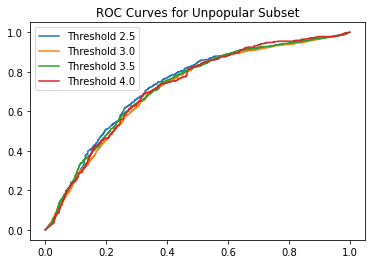

In [ ]:
reader = Reader(rating_scale=(0,5))
data = Dataset.load_from_df(ratings_raw[["userId", "movieId", "rating"]], reader)
trainset, testset = train_test_split(data, test_size=0.1)
algo = NMF(n_factors=15, biased=True)

algo.fit(trainset)

trimmed = trim_unpop(testset)
preds = algo.test(trimmed)
preds = [x.est for x in preds]

thresholded_gt = {}
for threshold in [2.5, 3.0, 3.5, 4.0]:
  thresholded_gt[threshold] = [1 if x[2] > threshold else 0 for x in trimmed]

for i, threshold in enumerate([2.5, 3.0, 3.5, 4.0]):
  fpr, tpr, _ = roc_curve(thresholded_gt[threshold], preds)
  plt.plot(fpr, tpr, label=f"Threshold {threshold}")

plt.legend()
plt.title("ROC Curves for Unpopular Subset")

### High Variance Subset

Text(0.5, 1.0, 'ROC Curves for High Variance Subset')

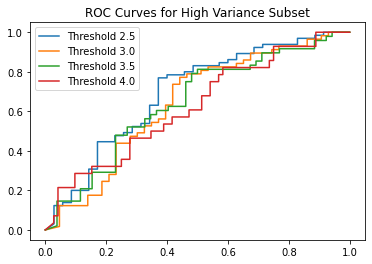

In [ ]:
reader = Reader(rating_scale=(0,5))
data = Dataset.load_from_df(ratings_raw[["userId", "movieId", "rating"]], reader)
trainset, testset = train_test_split(data, test_size=0.1)
algo = NMF(n_factors=15, biased=True)

algo.fit(trainset)

trimmed = trim_var(testset)
preds = algo.test(trimmed)
preds = [x.est for x in preds]

thresholded_gt = {}
for threshold in [2.5, 3.0, 3.5, 4.0]:
  thresholded_gt[threshold] = [1 if x[2] > threshold else 0 for x in trimmed]

for i, threshold in enumerate([2.5, 3.0, 3.5, 4.0]):
  fpr, tpr, _ = roc_curve(thresholded_gt[threshold], preds)
  plt.plot(fpr, tpr, label=f"Threshold {threshold}")

plt.legend()
plt.title("ROC Curves for High Variance Subset")

# Question 11

## Full Dataset

In [ ]:
from surprise import Dataset, Reader
from surprise.model_selection import cross_validate, train_test_split, KFold
from tqdm import tqdm
import collections

reader = Reader(rating_scale=(0,5))
data = Dataset.load_from_df(ratings_raw[["userId", "movieId", "rating"]], reader)
kf = KFold(n_splits=10)

rmses = []

for trainset, testset in kf.split(data):
  ids_to_ratings = collections.defaultdict(list)
  for movieId, userId, rating in trainset.all_ratings():
    ids_to_ratings[userId].append(rating)
  
  naive_filter = {k: np.mean(v) for k, v in ids_to_ratings.items()}

  current_error = 0.0
  count = 0
  for movieId, userId, gt in testset:
    try:
      prediction = naive_filter[trainset.to_inner_uid(userId)]
    except:
      prediction = 0.0

    current_error += (prediction-gt)**2
    count += 1
  
  current_error /= count
  rmses.append(np.sqrt(current_error))
print(f"Average RMSE across all 10 folds: {np.mean(rmses)}")

Average RMSE across all 10 folds: 3.360221054970264


## Subsets

### Popular

In [ ]:
reader = Reader(rating_scale=(0,5))
data = Dataset.load_from_df(ratings_raw[["userId", "movieId", "rating"]], reader)
kf = KFold(n_splits=10)

rmses = []

for trainset, testset in kf.split(data):
  ids_to_ratings = collections.defaultdict(list)
  for movieId, userId, rating in trainset.all_ratings():
    ids_to_ratings[userId].append(rating)
  
  naive_filter = {k: np.mean(v) for k, v in ids_to_ratings.items()}

  current_error = 0.0
  count = 0
  trimmed = trim_pop(testset)
  for movieId, userId, gt in trimmed:
    try:
      prediction = naive_filter[trainset.to_inner_uid(userId)]
    except:
      prediction = 0.0

    current_error += (prediction-gt)**2
    count += 1
  
  current_error /= count
  rmses.append(np.sqrt(current_error))
print(f"Average RMSE across all 10 folds: {np.mean(rmses)}")

Average RMSE across all 10 folds: 3.3719932438253446


### Unpopular

In [ ]:
reader = Reader(rating_scale=(0,5))
data = Dataset.load_from_df(ratings_raw[["userId", "movieId", "rating"]], reader)
kf = KFold(n_splits=10)

rmses = []

for trainset, testset in kf.split(data):
  ids_to_ratings = collections.defaultdict(list)
  for movieId, userId, rating in trainset.all_ratings():
    ids_to_ratings[userId].append(rating)
  
  naive_filter = {k: np.mean(v) for k, v in ids_to_ratings.items()}

  current_error = 0.0
  count = 0
  trimmed = trim_unpop(testset)
  for movieId, userId, gt in trimmed:
    try:
      prediction = naive_filter[trainset.to_inner_uid(userId)]
    except:
      prediction = 0.0

    current_error += (prediction-gt)**2
    count += 1
  
  current_error /= count
  rmses.append(np.sqrt(current_error))
print(f"Average RMSE across all 10 folds: {np.mean(rmses)}")

Average RMSE across all 10 folds: 3.3408464737101182


### High Variance

In [ ]:
reader = Reader(rating_scale=(0,5))
data = Dataset.load_from_df(ratings_raw[["userId", "movieId", "rating"]], reader)
kf = KFold(n_splits=10)

rmses = []

for trainset, testset in kf.split(data):
  ids_to_ratings = collections.defaultdict(list)
  for movieId, userId, rating in trainset.all_ratings():
    ids_to_ratings[userId].append(rating)
  
  naive_filter = {k: np.mean(v) for k, v in ids_to_ratings.items()}

  current_error = 0.0
  count = 0
  trimmed = trim_var(testset)
  for movieId, userId, gt in trimmed:
    try:
      prediction = naive_filter[trainset.to_inner_uid(userId)]
    except:
      prediction = 0.0

    current_error += (prediction-gt)**2
    count += 1
  
  current_error /= count
  rmses.append(np.sqrt(current_error))
print(f"Average RMSE across all 10 folds: {np.mean(rmses)}")

Average RMSE across all 10 folds: 3.491750567850116


# Question 13

Precision is the percentage of recommendations for which the user has given a rating. Recall is the percentage of the items that a user has rated that then get recommended back to the user.

# Question 14

In [ ]:
# Iterate over 10 folds
# Train model on train set
# Generate predictions on test set
# For each user in the test set
  # Argsort predictions
  # Generate G by thresholding
  # Find set intersection of indices
  # Calculate precision and recall
  # Add to lists so we can average over all folds

## NMF

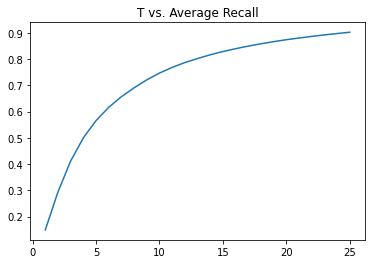

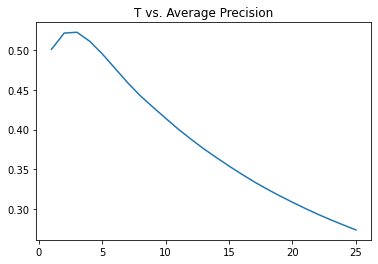

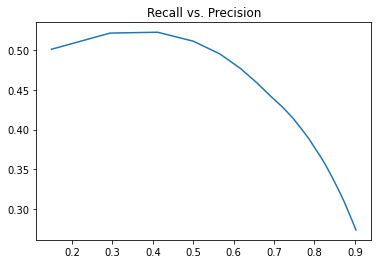

In [ ]:
from surprise import KNNBasic, Dataset, Reader, accuracy
from surprise.model_selection import cross_validate, KFold
from tqdm import tqdm
from surprise.prediction_algorithms.matrix_factorization import NMF


reader = Reader(rating_scale=(0,5))
data = Dataset.load_from_df(ratings_raw[["userId", "movieId", "rating"]], reader)
kf = KFold(n_splits=10)
g_threshold = 3.0

precisions = collections.defaultdict(list)
recalls = collections.defaultdict(list)

for trainset, testset in kf.split(data):
    precisions_this_fold = collections.defaultdict(list)
    recalls_this_fold = collections.defaultdict(list)

    algo = NMF(n_factors=20, biased=False)
    algo.fit(trainset)

    preds = algo.test(testset)

    unique_ids = set()
    for pred in preds:
      unique_ids.add(pred.uid)
    
    for current_id in unique_ids:
      G = set()
      ratings = collections.defaultdict(list)
      for pred in preds:
        if pred.uid != current_id:
          continue
        if pred.r_ui > g_threshold:
          G.add(pred.iid)
        ratings[pred.iid].append(pred.est)
    
      if len(G) == 0:
        continue
      
      rankings = sorted(ratings.items(), key=lambda x: x[1])

      for t in range(1, 26):
        top_t = set([x[0] for x in rankings[:t]])

        numerator = len(G.intersection(top_t))

        precisions_this_fold[t].append(numerator / t)
        recalls_this_fold[t].append(numerator / len(G))

    for k, v in precisions_this_fold.items():
      precisions[k].append(np.mean(v))
    for k, v in recalls_this_fold.items():
      recalls[k].append(np.mean(v))

mean_recalls = [np.mean(x[1]) for x in recalls.items()]
mean_precisions = [np.mean(x[1]) for x in precisions.items()]

plt.plot(np.arange(1,26), mean_recalls)
plt.title("T vs. Average Recall")
plt.figure()
plt.plot(np.arange(1,26), mean_precisions)
plt.title("T vs. Average Precision")
plt.figure()
plt.plot(mean_recalls, mean_precisions)
plt.title("Recall vs. Precision")

mean_recalls_nmf = mean_recalls
mean_precisions_nmf = mean_precisions

## MF

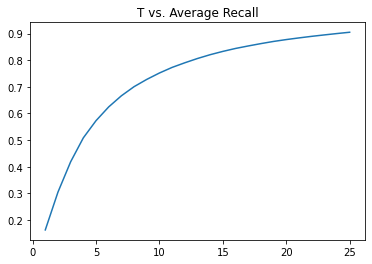

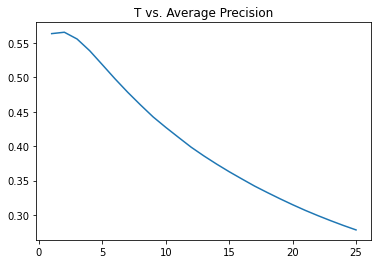

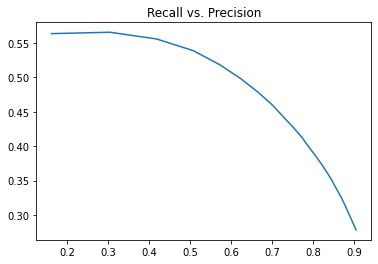

In [ ]:
from surprise import KNNBasic, Dataset, Reader, accuracy
from surprise.model_selection import cross_validate, KFold
from tqdm import tqdm
from surprise.prediction_algorithms.matrix_factorization import NMF


reader = Reader(rating_scale=(0,5))
data = Dataset.load_from_df(ratings_raw[["userId", "movieId", "rating"]], reader)
kf = KFold(n_splits=10)
g_threshold = 3.0

precisions = collections.defaultdict(list)
recalls = collections.defaultdict(list)

for trainset, testset in kf.split(data):
    precisions_this_fold = collections.defaultdict(list)
    recalls_this_fold = collections.defaultdict(list)

    algo = NMF(n_factors=15, biased=True)
    algo.fit(trainset)

    preds = algo.test(testset)

    unique_ids = set()
    for pred in preds:
      unique_ids.add(pred.uid)
    
    for current_id in unique_ids:
      G = set()
      ratings = collections.defaultdict(list)
      for pred in preds:
        if pred.uid != current_id:
          continue
        if pred.r_ui > g_threshold:
          G.add(pred.iid)
        ratings[pred.iid].append(pred.est)
    
      if len(G) == 0:
        continue
      
      rankings = sorted(ratings.items(), key=lambda x: x[1])

      for t in range(1, 26):
        top_t = set([x[0] for x in rankings[:t]])

        numerator = len(G.intersection(top_t))

        precisions_this_fold[t].append(numerator / t)
        recalls_this_fold[t].append(numerator / len(G))

    for k, v in precisions_this_fold.items():
      precisions[k].append(np.mean(v))
    for k, v in recalls_this_fold.items():
      recalls[k].append(np.mean(v))

mean_recalls = [np.mean(x[1]) for x in recalls.items()]
mean_precisions = [np.mean(x[1]) for x in precisions.items()]

plt.plot(np.arange(1,26), mean_recalls)
plt.title("T vs. Average Recall")
plt.figure()
plt.plot(np.arange(1,26), mean_precisions)
plt.title("T vs. Average Precision")
plt.figure()
plt.plot(mean_recalls, mean_precisions)
plt.title("Recall vs. Precision")

mean_recalls_mf = mean_recalls
mean_precisions_mf = mean_precisions

## Naive

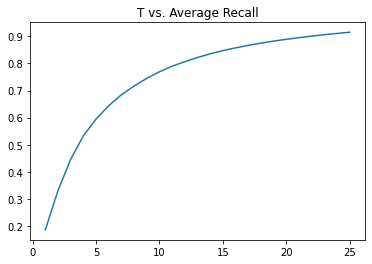

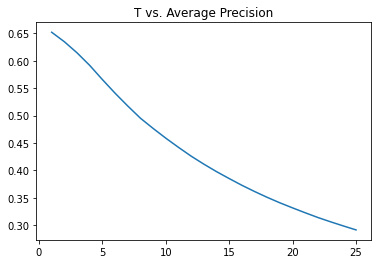

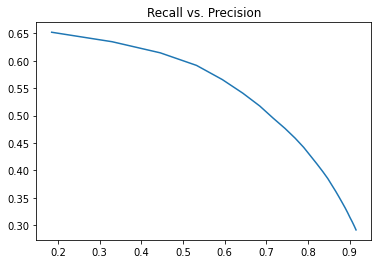

In [ ]:
from surprise import KNNBasic, Dataset, Reader, accuracy
from surprise.model_selection import cross_validate, KFold
from tqdm import tqdm
from surprise.prediction_algorithms.matrix_factorization import NMF


reader = Reader(rating_scale=(0,5))
data = Dataset.load_from_df(ratings_raw[["userId", "movieId", "rating"]], reader)
kf = KFold(n_splits=10)
g_threshold = 3.0

precisions = collections.defaultdict(list)
recalls = collections.defaultdict(list)

for trainset, testset in kf.split(data):
  ids_to_ratings = collections.defaultdict(list)
  for movieId, userId, rating in trainset.all_ratings():
    ids_to_ratings[userId].append(rating)
  
  naive_filter = {k: np.mean(v) for k, v in ids_to_ratings.items()}

  preds = []
  for sample in testset:
    if sample[0] not in naive_filter:
      continue
    
    preds.append((sample[0], sample[1], sample[2], naive_filter[sample[0]]))
  
  unique_ids = set()
  for pred in preds:
    unique_ids.add(pred[0])
  
  for current_id in unique_ids:
    G = set()
    ratings = collections.defaultdict(list)
    for pred in preds:
      if pred[0] != current_id:
        continue
      if pred[2] > g_threshold:
        G.add(pred[1])
      ratings[pred[1]].append(pred[3])
  
    if len(G) == 0:
      continue
    
    rankings = sorted(ratings.items(), key=lambda x: x[1])

    for t in range(1, 26):
      top_t = set([x[0] for x in rankings[:t]])

      numerator = len(G.intersection(top_t))

      precisions_this_fold[t].append(numerator / t)
      recalls_this_fold[t].append(numerator / len(G))

  for k, v in precisions_this_fold.items():
    precisions[k].append(np.mean(v))
  for k, v in recalls_this_fold.items():
    recalls[k].append(np.mean(v))

mean_recalls = [np.mean(x[1]) for x in recalls.items()]
mean_precisions = [np.mean(x[1]) for x in precisions.items()]

plt.plot(np.arange(1,26), mean_recalls)
plt.title("T vs. Average Recall")
plt.figure()
plt.plot(np.arange(1,26), mean_precisions)
plt.title("T vs. Average Precision")
plt.figure()
plt.plot(mean_recalls, mean_precisions)
plt.title("Recall vs. Precision")

mean_recalls_naive = mean_recalls
mean_precisions_naive = mean_precisions

## ROC Curves

Text(0.5, 1.0, 'ROC Curves for All Ranking Models')

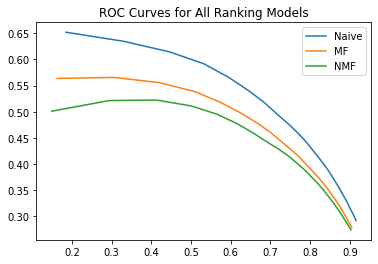

In [ ]:
plt.plot(mean_recalls_naive, mean_precisions_naive, label='Naive')
plt.plot(mean_recalls_mf, mean_precisions_mf, label='MF')
plt.plot(mean_recalls_nmf, mean_precisions_nmf, label='NMF')
plt.legend()
plt.title("ROC Curves for All Ranking Models")